# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | inari
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | lautoka
Processing Record 6 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | crane
Processing Record 10 of Set 1 | port douglas
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | okahao
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | boa vista
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | mejit
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | ihosy
Processing Record 20 of Set 1 | papar
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | kefla

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,34.65,90,93,37.11,TF,1720309975
1,college,64.8569,-147.8028,60.75,84,100,13.80,US,1720309976
2,inari,68.9060,27.0288,55.96,78,99,11.30,FI,1720309977
3,hamilton,39.1834,-84.5333,83.03,58,71,8.01,US,1720309979
4,lautoka,-17.6167,177.4667,80.46,57,20,13.80,FJ,1720309980


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,34.65,90,93,37.11,TF,1720309975
1,college,64.8569,-147.8028,60.75,84,100,13.80,US,1720309976
2,inari,68.9060,27.0288,55.96,78,99,11.30,FI,1720309977
3,hamilton,39.1834,-84.5333,83.03,58,71,8.01,US,1720309979
4,lautoka,-17.6167,177.4667,80.46,57,20,13.80,FJ,1720309980


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

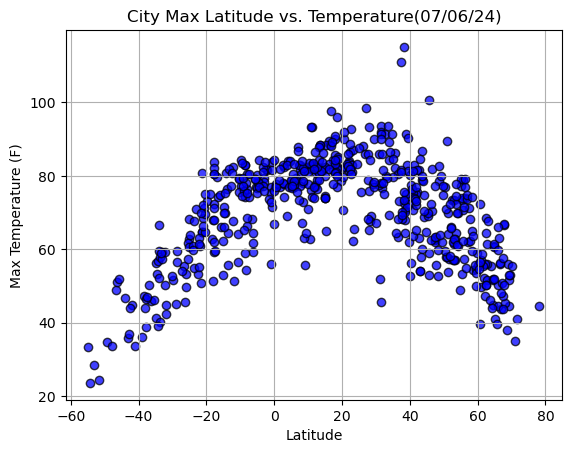

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            edgecolor = "black", color= "blue",
            linewidth = 1, marker = 'o', alpha = .75, label = 'Cities')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

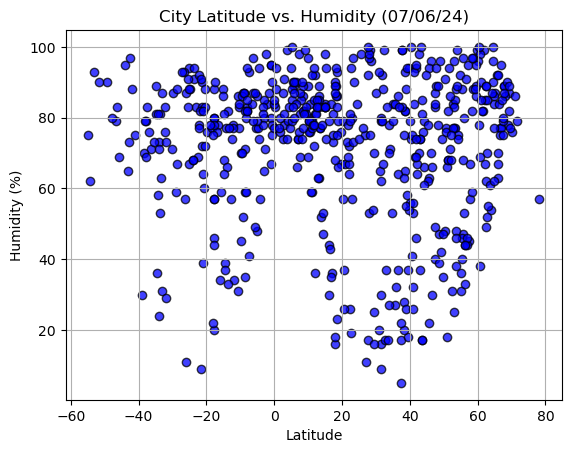

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", color = "blue",
            linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

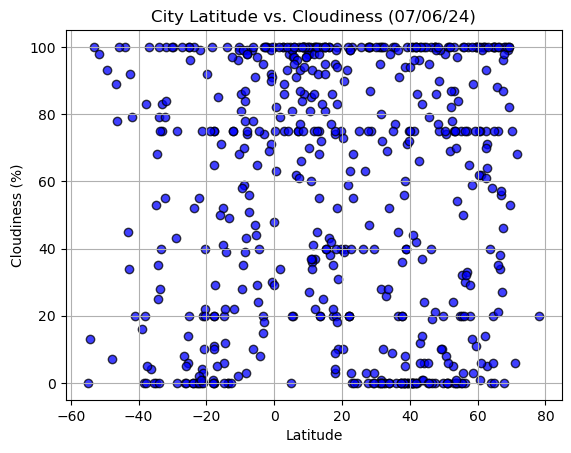

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", color="blue",
            linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

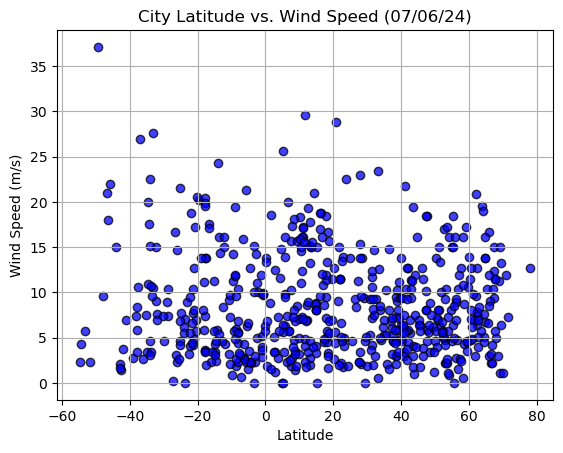

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", color="blue",
            linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
    # (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # regress_values = x_values * slope + intercept
    # line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,60.75,84,100,13.80,US,1720309976
2,inari,68.9060,27.0288,55.96,78,99,11.30,FI,1720309977
3,hamilton,39.1834,-84.5333,83.03,58,71,8.01,US,1720309979
5,thompson,55.7435,-97.8558,78.96,47,100,0.00,CA,1720309982
7,crane,31.3974,-102.3501,93.63,30,28,10.63,US,1720309985


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,34.65,90,93,37.11,TF,1720309975
4,lautoka,-17.6167,177.4667,80.46,57,20,13.80,FJ,1720309980
6,adamstown,-25.0660,-130.1015,68.31,67,100,21.54,PN,1720309983
8,port douglas,-16.4833,145.4667,74.23,78,85,17.52,AU,1720309986
9,east london,-33.0153,27.9116,59.18,31,75,10.47,ZA,1720309987


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6695855632138121


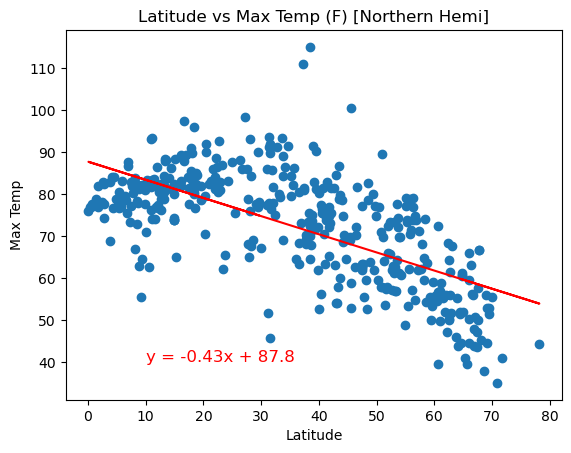

In [87]:
# Linear regression on Northern Hemisphere
xValues = northern_hemi_df ["Lat"]
yValues = northern_hemi_df ["Max Temp"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(10,40), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp (F) [Northern Hemi]")
print(f'The r-value is {rvalue}')

The r-value is 0.832469841197998


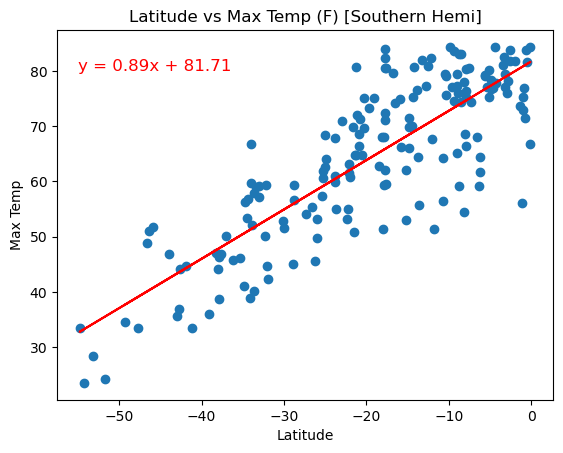

In [88]:
# Linear regression on Southern Hemisphere
xValues = southern_hemi_df ["Lat"]
yValues = southern_hemi_df ["Max Temp"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(-55,80), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp (F) [Southern Hemi]")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:**
## Northern Hemisphere
For each degree increase in latitude, the maximum temperature decreases by 0.43 degrees Fahrenheit. There is a negative correlation between latitude and maximum temperature in the Northern Hemisphere. The r^2 value can attest to a possible direct correlation between max temperature and latitude. The data points are scattered around the regression line, indicating some variability, but the overall trend is clear.

## Southern Hemisphere
For each degree increase in latitude (moving northward within the Southern Hemisphere), the maximum temperature increases by 0.89 degrees Fahrenheit. There is a positive correlation between latitude and maximum temperature in the Southern Hemisphere. The r^2 value can attest to a possible direct correlation between max temperature and latitude. The data points are more tightly clustered around the regression line compared to the Northern Hemisphere plot, indicating a stronger linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.05897998054542827


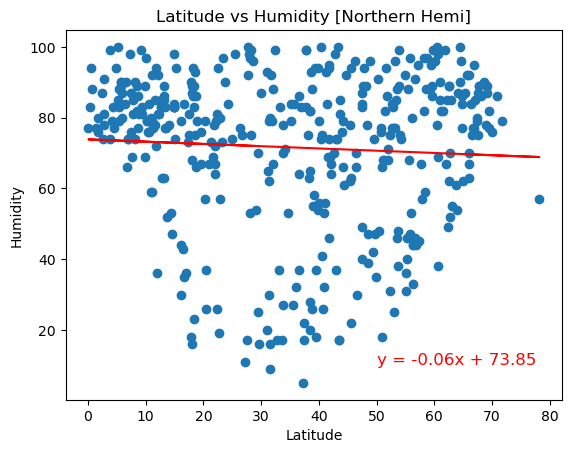

In [89]:
# Northern Hemisphere
xValues = northern_hemi_df ["Lat"]
yValues = northern_hemi_df ["Humidity"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(50,10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity [Northern Hemi]")
print(f'The r-value is {rvalue}')

The r-value is 0.03605474024401178


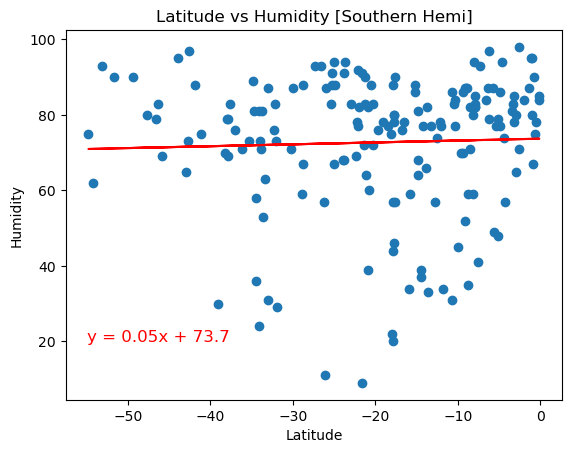

In [91]:
# Southern Hemisphere
xValues = southern_hemi_df ["Lat"]
yValues = southern_hemi_df ["Humidity"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(-55,20), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity [Southern Hemi]")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:**
## Northern Hemisphere
For each unit increase in latitude, the humidity decreased by 0.06. There is a very miniscule negative correlation between latitude and humidity in the Northern Hemisphere. As the latitude increases (moving further from the equator towards the poles), the humidity doesn't have a strong correlation that can be proven by the r^2 value. The data points are scattered around the regression line, indicating some variability, therefore the correlation isn't quite clear.
## Southern Hemisphere
For each unit increase in latitude, the humidity increased by 0.05. There is a very miniscule positive correlation between latitude and humidity in the Northern Hemisphere. As the latitude increases (moving further from the equator towards the poles), the humidity doesn't have a strong correlation that can be proven by the r^2 value. The data points are scattered around the regression line, indicating some variability, therefore the correlation isn't quite clear.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.1522168213640092


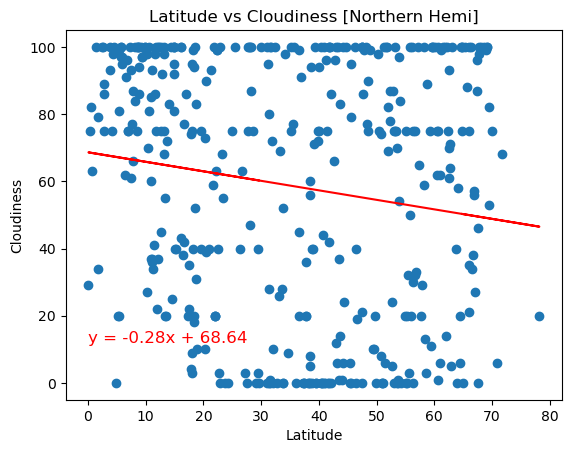

In [94]:
# Northern Hemisphere
xValues = northern_hemi_df ["Lat"]
yValues = northern_hemi_df ["Cloudiness"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(0,12), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness [Northern Hemi]")
print(f'The r-value is {rvalue}')

The r-value is 0.13266635701450671


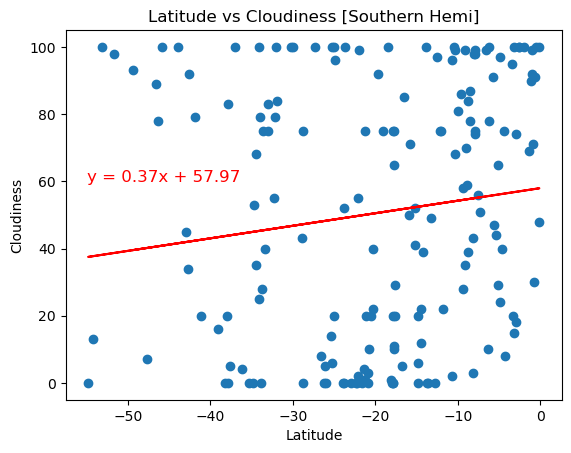

In [96]:
# Southern Hemisphere
xValues = southern_hemi_df ["Lat"]
yValues = southern_hemi_df ["Cloudiness"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(-55,60), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness [Southern Hemi]")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:**
## Northern Hemisphere
For each unit increase in latitude, the cloudiness decreased by 0.28. There is a negative correlation between latitude and cloudiness in the Northern Hemisphere. As the latitude increases (moving further from the equator towards the poles), the cloudiness differs drastically with no direct correlation to latitude. The r^2 value can attest to the lack of correlation between latitude and cloudiness. The data points are scattered around the regression line, indicating some variability, therefore the correlation isn't quite clear.
## Southern Hemisphere
For each unit increase in latitude, the cloudiness increases by 0.37. There is a positive correlation between latitude and cloudiness in the Northern Hemisphere. As the latitude increases (moving further from the equator towards the poles), the cloudiness differs drastically with no direct correlation to latitude. The r^2 value can attest to the lack of correlation between latitude and cloudiness.The data points are scattered around the regression line, indicating some variability, therefore the correlation isn't quite clear.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.06893351997336375


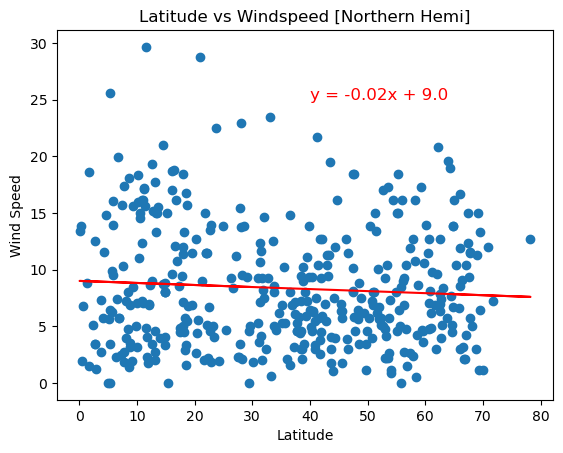

In [98]:
# Northern Hemisphere
xValues = northern_hemi_df ["Lat"]
yValues = northern_hemi_df ["Wind Speed"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(40,25), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Windspeed [Northern Hemi]")
print(f'The r-value is {rvalue}')

The r-value is -0.16916265219921914


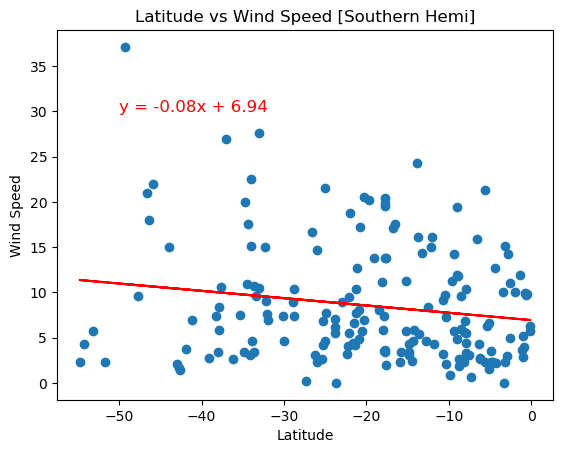

In [100]:
# Southern Hemisphere
xValues = southern_hemi_df ["Lat"]
yValues = southern_hemi_df ["Wind Speed"]
slope = linregress(xValues, yValues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(xValues, yValues)
plt.plot(xValues, regress_values, "-r")
plt.annotate(line_eq,(-50,30), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed [Southern Hemi]")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:**
## Northern Hemisphere
For each unit increase in latitude, the wind speed decreased by 0.02. There is a negative correlation between latitude and wind speed in the Northern Hemisphere. As the latitude increases (moving further from the equator towards the poles), the wind speed differs drastically with no direct correlation to latitude. The r^2 value can attest to the lack of correlation between latitude and wind speed. The data points are scattered around the regression line, indicating some variability, therefore the correlation isn't quite clear.
## Southern Hemisphere
For each unit increase in latitude, the wind speed decreased by 0.08. There is a negative correlation between latitude and wind speed in the Northern Hemisphere. As the latitude increases (moving further from the equator towards the poles), the wind speed differs drastically with no direct correlation to latitude. The r^2 value can attest to the lack of correlation between latitude and wind speed. The data points are scattered around the regression line, indicating some variability, therefore the correlation isn't quite clear.